# A/B Testing Promosi Pemasaran

Jenis promosi yang manakah yang paling efektif?

<b>Skenario :</b><br>
Sebuah rantai makanan cepat saji berencana untuk menambahkan item baru ke menunya. Namun, mereka masih belum memutuskan antara tiga kemungkinan kampanye pemasaran untuk mempromosikan produk baru. Untuk menentukan promosi mana yang memiliki pengaruh terbesar pada penjualan, item baru diperkenalkan di lokasi di beberapa pasar yang dipilih secara acak. Promosi berbeda digunakan di setiap lokasi, dan penjualan mingguan item baru dicatat selama empat minggu pertama.
<br>
<b>Deskripsi dari dataset yang digunakan :</b> terdiri dari 548 entri yang termasuk :
* MarketId: id internal yang digunakan untuk mendeskripsikan jenis pasar, disini tidak digunakan.
* AgeOfStores: Usia toko dalam tahun (1–28). Usia rata-rata sebuah toko adalah 8,5 tahun.
* LocationID: Id unik untuk lokasi toko. Setiap lokasi diidentifikasi dengan nomor. Jumlah toko adalah 137.
* Promosi: Salah satu dari tiga promosi yang diuji (A, B, C). Pada dataset tersebut tidak diketahui secara spesifik setiap promosi.
* Penjualan (dalam Ribuan): Jumlah penjualan untuk ID Lokasi, Promosi, dan minggu tertentu. Jumlah rata-rata penjualan adalah 53,5 ribu dolar.
* Ukuran pasar: ada tiga jenis ukuran pasar: kecil, menengah dan besar.
* Minggu: Satu dari empat minggu saat promosi dijalankan (1-4).

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('ab_testing.csv')
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,C,1,33.73
1,1,Medium,1,4,C,2,35.67
2,1,Medium,1,4,C,3,29.03
3,1,Medium,1,4,C,4,39.25
4,1,Medium,2,5,B,1,27.81
5,1,Medium,2,5,B,2,34.67
6,1,Medium,2,5,B,3,27.98
7,1,Medium,2,5,B,4,27.72
8,1,Medium,3,12,A,1,44.54
9,1,Medium,3,12,A,2,37.94


In [16]:
# Dimensi data
df.shape

(548, 7)

In [17]:
# Kolom yang tersedia
df.columns.tolist()

['MarketID',
 'MarketSize',
 'LocationID',
 'AgeOfStore',
 'Promotion',
 'week',
 'SalesInThousands']

In [18]:
# Periksa data kosong
df.isnull().sum().values.sum()

0

In [19]:
# Periksa jumlah kategori (unik) pada setiap kolom
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64

In [20]:
# Priksa data secara keseluruhan
df.describe()

,MarketID,LocationID,AgeOfStore,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.500000,53.466204
std,2.877001,287.973679,6.638345,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,4.000000,99.650000


# Exploratory Data Analysis

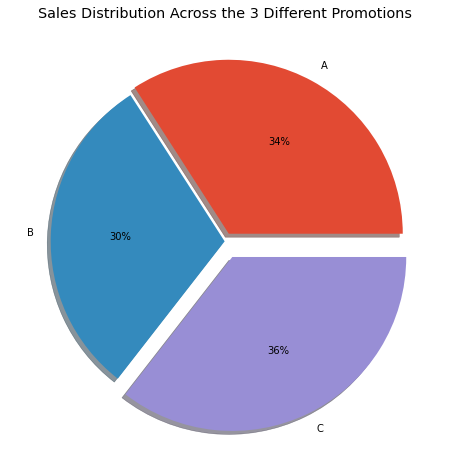

In [21]:
# ggplot's style
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode=(0.05,0,0.1))
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

In [22]:
# Lihat marketsize pada setiap promosi yang ada
df.groupby(['Promotion', 'MarketSize']).count()['MarketID']

Promotion  MarketSize
A          Large          56
           Medium         96
           Small          20
B          Large          64
           Medium        108
           Small          16
C          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [23]:
# Lihat jumlah setiap marketsize pada masing-masing promosi
df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
A,56,96,20
B,64,108,16
C,48,116,24


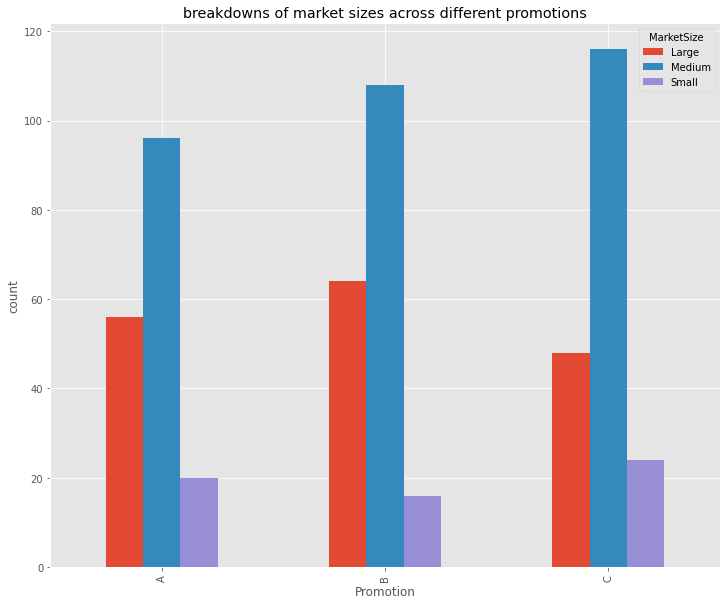

In [25]:
# Buat grafik berdasarkan
# jumlah setiap marketsize pada masing-masing promosi

# Put this into a plot
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

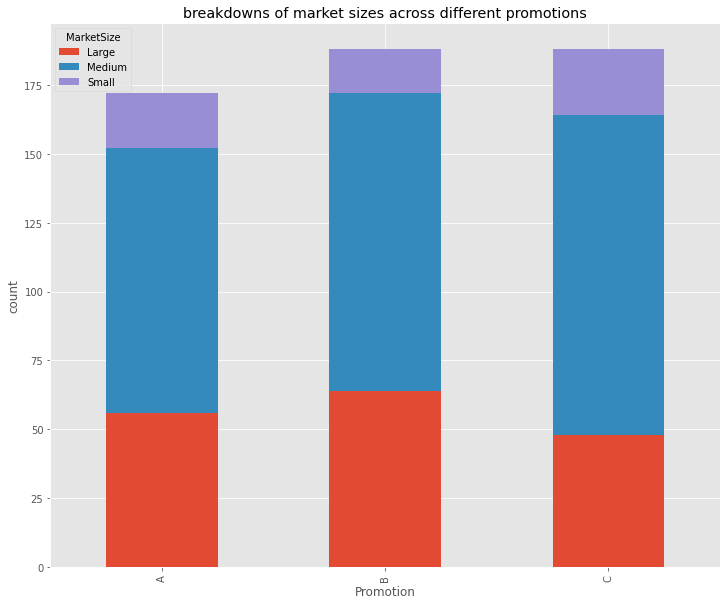

In [26]:
# Buat 3 data dalam 1 grafik untuk setiap jenis promosi
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

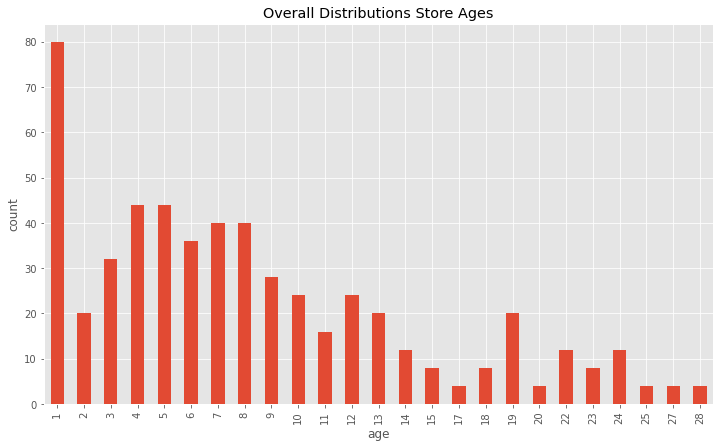

In [27]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar', 
    figsize=(12,7),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

In [28]:
# Tampilkan data jumlah promosi untuk setiap jenis promosi pada masing-masing usia toko
df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID']

AgeOfStore  Promotion
1           A            24
            B            36
            C            20
2           A             8
            B             8
            C             4
3           A            16
            B            12
            C             4
4           A            16
            B            12
            C            16
5           A             8
            B            12
            C            24
6           A            20
            B             4
            C            12
7           A             4
            B            24
            C            12
8           A            12
            B             8
            C            20
9           A             8
            B            12
            C             8
10          B            16
            C             8
11          A             4
            C            12
12          A            12
            B             4
            C             8
13          A            1

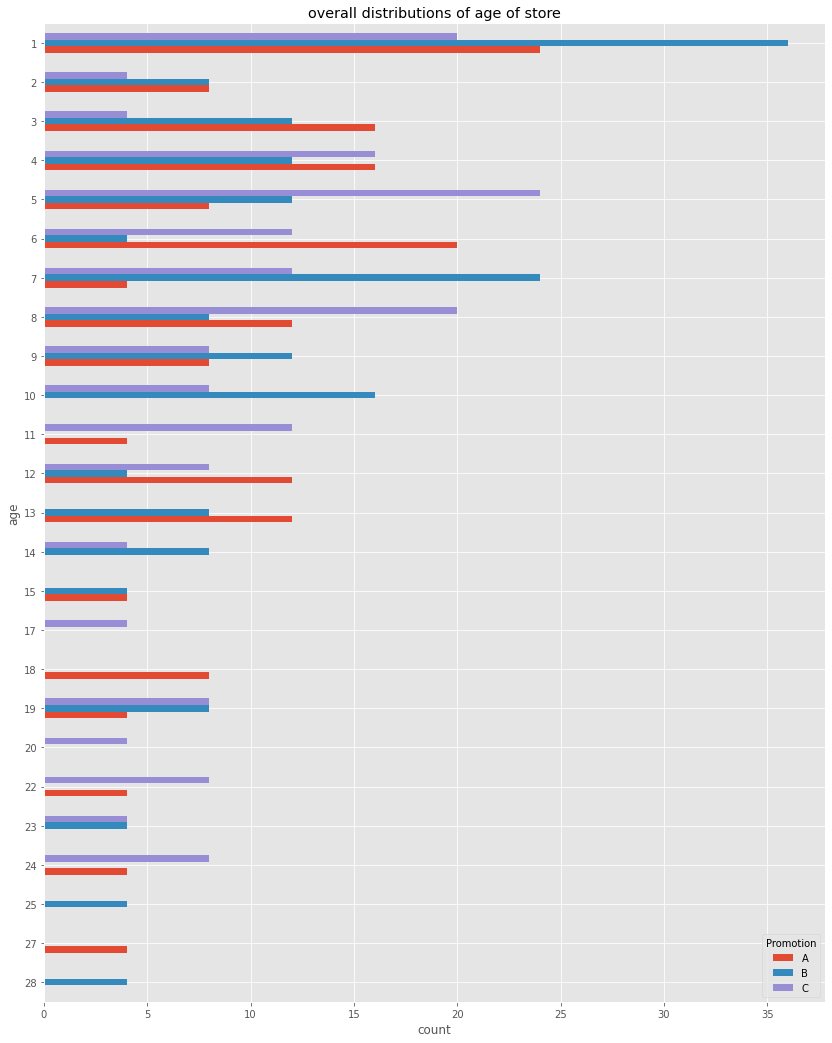

In [29]:
# Visualisasi jumlah promosi untuk setiap usia toko
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh', 
    figsize=(14,18),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [30]:
# Tampilkan statistik setiap jenis promosi
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
A,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
B,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
C,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


Tabel diatas memudahkan untuk mengetahui ringkasan statistik dari jenis-jenis promosi.<br>
Usia toko rata-rata 8-9 tahun.<br>
Mayoritas toko memiliki usia 10-12 tahun.<br>
Pada deskripsi tersebut dapat diketahui bahwa hampir setiap toko memiliki kemiripan statistik.<br>
Ini menunjukkan bahwa kelompok sampel kami terkontrol dengan baik dan hasil pengujian A/B akan bermakna dan dapat dipercaya.

# Pengujian A/B testing

In [31]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']
print('Rata-rata Penjualan Pada Promosi : \n',means)
print('\nStandar Deviasi Penjualan Pada Promosi : \n',stds)
print('\nJumlah Penjualan Pada Promosi : \n',ns)

Rata-rata Penjualan Pada Promosi : 
 Promotion
A    58.099012
B    47.329415
C    55.364468
Name: SalesInThousands, dtype: float64

Standar Deviasi Penjualan Pada Promosi : 
 Promotion
A    16.553782
B    15.108955
C    16.766231
Name: SalesInThousands, dtype: float64

Jumlah Penjualan Pada Promosi : 
 Promotion
A    172
B    188
C    188
Name: SalesInThousands, dtype: int64


<b>T-Value</b><br>
Nilai-t mengukur tingkat perbedaan relatif terhadap variasi dalam kelompok data yang digunakan. Nilai t yang besar menunjukkan tingkat perbedaan yang lebih tinggi antar kelompok data.<br>
<b>P-Value</b><br>
P-value mengukur probabilitas bahwa hasil akan terjadi secara kebetulan. Oleh karena itu, semakin kecil nilai p, semakin signifikan (penting) perbedaan antara kedua kelompok.

# Perbanding Promosi 1 dengan Promosi 2 dalam uji A/B

In [33]:
# Computing the t and p values using scipy 
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 'A',
                              'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 'B',
                              'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


# Analisa P dan t-Values
Nilai P kami mendekati 0 yang menunjukkan bahwa ada bukti yang baik untuk MENOLAK Hipotesis Null. Artinya ada perbedaan statistik antara kedua kelompok. Ambang batas kami menolak Null biasanya kurang dari 0,05.<br>
T-test kami menunjukkan bahwa kinerja pemasaran untuk kedua kelompok ini secara signifikan berbeda dan bahwa kelompok promosi A mengungguli grup promosi B.

# Perbandingan Promosi 1 dengan Promosi 3 dalam uji A/B <br>
Namun, jika kami menjalankan t-test antara grup promosi 1 dan grup promosi 3, kami melihat hasil yang berbeda:

In [34]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 'A', 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 'C', 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


# Hasil analisa P dan t-values <br>
Kami mencatat bahwa penjualan rata-rata dari grup promosi A (58,1) lebih tinggi daripada dari grup promosi C (55,36).<br>
Tapi, menjalankan t-test antara kedua kelompok ini, memberi kita nilai t 1,556 dan nilai p 0,121.<br>
Nilai p yang dihitung jauh lebih tinggi dari 0,05, melewati ambang batas untuk signifikansi statistik.